# SGD vs. O-SGD @ CIFAR-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

TYPE_ACC = 'accs'
TYPE_LOS = 'loss'
TYPE_TIM = 'times'

def load_single(fromdir, prefix):
    return np.load(os.path.join(fromdir, prefix) + '.npy')

def load_pair(fromdir, t):
    return load_single(fromdir, 'sgd_' + t), load_single(fromdir, 'osgd_' + t)

def get_plottable(arr):
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    return mean, std

def plot_data_pair(fromdir, tp, title, xlab, ylab, save_as=None):
    sgd, osgd = load_pair(fromdir, tp)
    sgd_mean, sgd_std = get_plottable(sgd) 
    osgd_mean, osgd_std = get_plottable(osgd) 
        
    xs = np.arange(1, sgd_mean.shape[0] + 1)
    plt.subplots(1, 1, figsize=(20, 5))

    plt.grid(True, which='major')
    plt.plot(xs, sgd_mean, 'b--', label='SGD')
    plt.plot(xs, osgd_mean, 'g--',  label='O-SGD')
    plt.fill_between(xs, sgd_mean - sgd_std, sgd_mean + sgd_std, alpha=0.9, color='#bbbbdd')
    plt.fill_between(xs, osgd_mean - osgd_std, osgd_mean + osgd_std, alpha=0.9, color='#bbddbb')
    plt.title(title, size=20)
    plt.xlabel(xlab, size=16)
    plt.ylabel(ylab, size=16)
    plt.legend(fontsize='x-large')
    if save_as is not None:
        plt.savefig(save_as)
    

------------------------------------
## N=10 reps, E=10 epochs per rep, update distribution every 10 batches

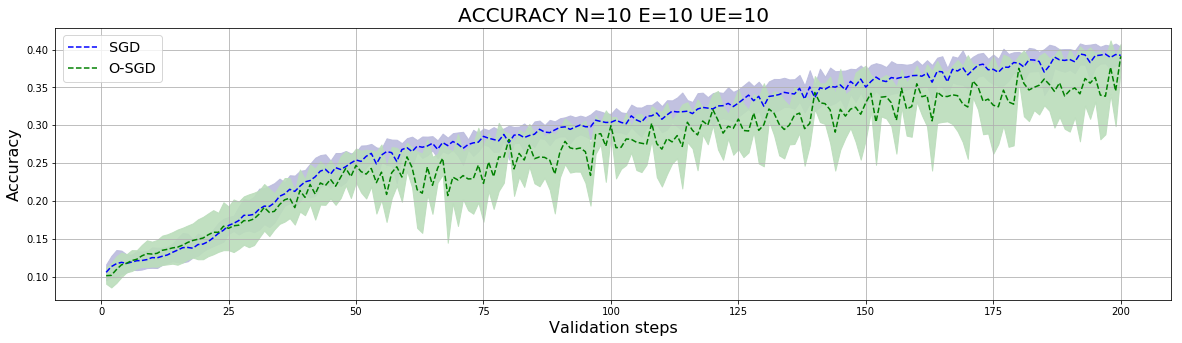

In [2]:
plot_data_pair('cifar10-x10e10ue10', TYPE_ACC, 'ACCURACY N=10 E=10 UE=10', 'Validation steps', 'Accuracy', 'cifar10-x10e10ue10-acc.png')

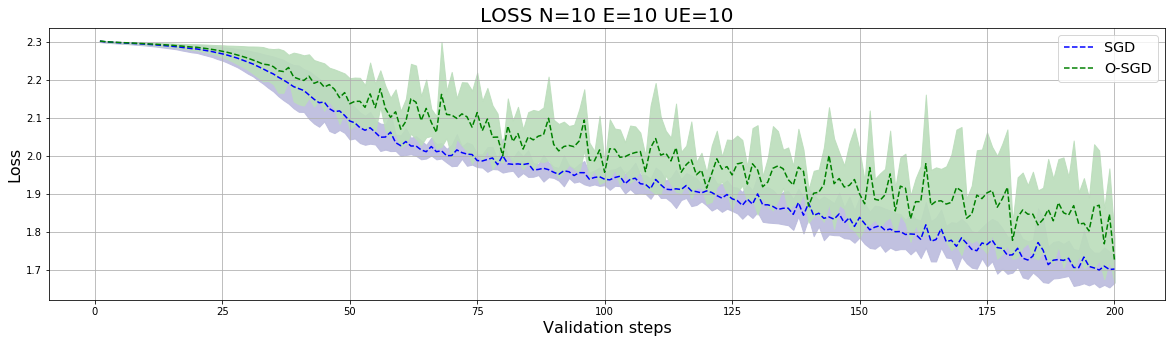

In [3]:
plot_data_pair('cifar10-x10e10ue10', TYPE_LOS, 'LOSS N=10 E=10 UE=10', 'Validation steps', 'Loss', 'cifar10-x10e10ue10-loss.png')

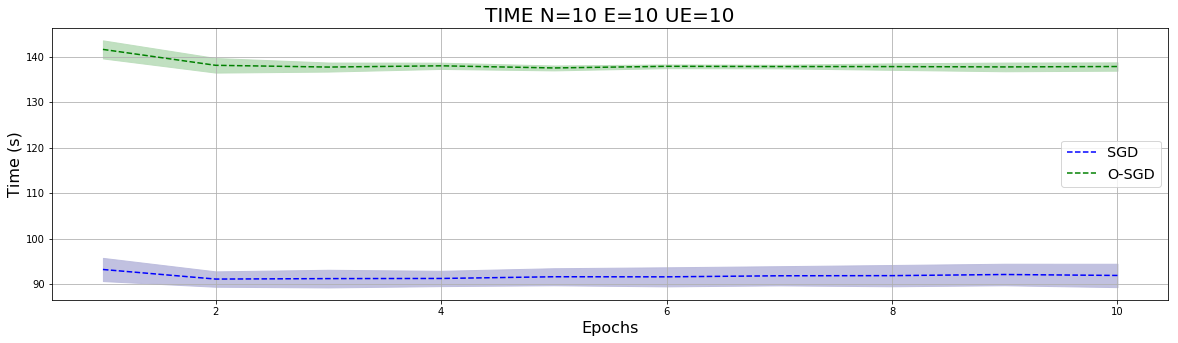

In [4]:
plot_data_pair('cifar10-x10e10ue10', TYPE_TIM, 'TIME N=10 E=10 UE=10', 'Epochs', 'Time (s)', 'cifar10-x10e10ue10-times.png')